In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,roc_curve,roc_auc_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold,StratifiedKFold
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import scale,StandardScaler,normalize
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import lightgbm as lgb
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Let's import datasets

In [2]:
df_train = pd.read_csv("data/healthtrain.csv")
df_test = pd.read_csv("data/healthtest.csv")
df_pred = pd.read_csv("data/healthpred.csv")

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1584 entries, 0 to 1583
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1584 non-null   object 
 1   x1      1584 non-null   int64  
 2   x2      1584 non-null   float64
 3   x3      1584 non-null   object 
 4   x4      1584 non-null   float64
 5   x5      1540 non-null   float64
 6   x6      1584 non-null   float64
 7   x7      1584 non-null   float64
 8   x8      1567 non-null   float64
 9   x9      1584 non-null   float64
 10  x10     1557 non-null   float64
 11  x11     1584 non-null   float64
 12  x12     1584 non-null   float64
 13  x13     1584 non-null   float64
 14  x14     1584 non-null   object 
 15  x15     1584 non-null   float64
 16  x16     1584 non-null   float64
 17  x17     1584 non-null   float64
 18  x18     1584 non-null   float64
 19  x19     1584 non-null   float64
 20  x20     1584 non-null   float64
 21  x21     1584 non-null   float64
 22  

In [4]:
df_train.target.value_counts().head(15)

Low risk         1235
Moderate risk     219
High risk         130
Name: target, dtype: int64

# First, let's assign categorical variables.

In [5]:
def encode_proficiency(value):
    if value == 'Low risk':
        return 1
    elif value == 'Moderate risk':
        return 2
    elif value == 'High risk':
        return 3
    else:
        return 0
    
df_train['target'] = df_train['target'].apply(encode_proficiency)

In [6]:
df_train

,id,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
0,PA1001,1406,145.0,F,0.005,0.000,0.002,0.000,0.0,0.000,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,1
1,PA1002,258,127.0,M,0.012,0.000,0.008,0.004,0.0,0.000,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,1
2,PA1003,479,145.0,F,0.000,0.000,0.000,0.002,0.0,0.000,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,1
3,PA1004,906,146.0,F,0.004,0.000,0.005,0.003,0.0,0.000,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,1
4,PA1005,1921,140.0,F,0.002,0.003,0.006,0.006,0.0,0.000,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1579,PA2580,2077,130.0,M,0.005,0.001,0.001,0.000,0.0,0.000,...,127.0,158.0,2.0,0.0,139.0,139.0,140.0,3.0,0.0,1
1580,PA2581,664,138.0,F,0.000,0.003,0.003,0.000,0.0,0.002,...,69.0,187.0,10.0,1.0,142.0,130.0,140.0,61.0,0.0,2
1581,PA2582,1431,144.0,F,0.000,0.000,0.006,0.000,0.0,0.000,...,139.0,169.0,2.0,0.0,157.0,155.0,157.0,2.0,0.0,2
1582,PA2583,630,134.0,F,0.017,0.002,0.004,0.000,0.0,0.000,...,50.0,170.0,5.0,0.0,160.0,150.0,155.0,28.0,1.0,1


In [7]:
def encode_proficiency(value):
    if value == 'M':
        return 1
    elif value == 'F':
        return 2
    else:
        return 0
    
df_train['x3'] = df_train['x3'].apply(encode_proficiency)

In [8]:
df_train.x14.value_counts().head(15)

O+     410
A+     328
B+     307
A-     165
B-     154
O-     146
AB+     57
AB-     17
Name: x14, dtype: int64

In [9]:
def encode_proficiency(value):
    if value == 'O-':
        return 1
    elif value == 'O+':
        return 2
    elif value == 'A+':
        return 3
    elif value == 'A-':
        return 4
    elif value == 'B+':
        return 5
    elif value == 'B-':
        return 6
    elif value == 'AB+':
        return 7
    elif value == 'AB-':
        return 8
    else:
        return 0
    
df_train['x14'] = df_train['x14'].apply(encode_proficiency)

In [10]:
df_train.x14.value_counts().head(15)

2    410
3    328
5    307
4    165
6    154
1    146
7     57
8     17
Name: x14, dtype: int64

In [11]:
df_train.x3.value_counts().head(15)

1    842
2    742
Name: x3, dtype: int64

In [12]:
df_train.target.value_counts().head(15)

1    1235
2     219
3     130
Name: target, dtype: int64

# Let's do the same for the test data.

In [13]:
def encode_proficiency(value):
    if value == 'M':
        return 1
    elif value == 'F':
        return 2
    else:
        return 0
    
df_test['x3'] = df_test['x3'].apply(encode_proficiency)

In [14]:
def encode_proficiency(value):
    if value == 'O-':
        return 1
    elif value == 'O+':
        return 2
    elif value == 'A+':
        return 3
    elif value == 'A-':
        return 4
    elif value == 'B+':
        return 5
    elif value == 'B-':
        return 6
    elif value == 'AB+':
        return 7
    elif value == 'AB-':
        return 8
    else:
        return 0
    
df_test['x14'] = df_test['x14'].apply(encode_proficiency)

In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      528 non-null    object 
 1   x1      528 non-null    int64  
 2   x2      528 non-null    int64  
 3   x3      528 non-null    int64  
 4   x4      528 non-null    float64
 5   x5      515 non-null    float64
 6   x6      528 non-null    float64
 7   x7      528 non-null    float64
 8   x8      522 non-null    float64
 9   x9      528 non-null    float64
 10  x10     517 non-null    float64
 11  x11     528 non-null    float64
 12  x12     528 non-null    int64  
 13  x13     528 non-null    float64
 14  x14     528 non-null    int64  
 15  x15     528 non-null    int64  
 16  x16     528 non-null    int64  
 17  x17     528 non-null    int64  
 18  x18     528 non-null    int64  
 19  x19     528 non-null    int64  
 20  x20     528 non-null    int64  
 21  x21     528 non-null    int64  
 22  x2

# let's get rid of the indexes and replace them with "id"

In [16]:
df_train.set_index('id', inplace=True)

In [17]:
df_test.set_index("id", inplace=True)

In [18]:
df_train

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,target
id,,,,,,,,,,,,,,,,,,,,,
PA1001,1406,145.0,2,0.005,0.000,0.002,0.000,0.0,0.000,46.0,...,104.0,171.0,4.0,0.0,155.0,153.0,154.0,4.0,1.0,1
PA1002,258,127.0,1,0.012,0.000,0.008,0.004,0.0,0.000,13.0,...,53.0,191.0,12.0,1.0,133.0,126.0,131.0,41.0,0.0,1
PA1003,479,145.0,2,0.000,0.000,0.000,0.002,0.0,0.000,57.0,...,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,1
PA1004,906,146.0,2,0.004,0.000,0.005,0.003,0.0,0.000,29.0,...,107.0,169.0,2.0,2.0,150.0,147.0,149.0,7.0,0.0,1
PA1005,1921,140.0,2,0.002,0.003,0.006,0.006,0.0,0.000,62.0,...,75.0,228.0,9.0,0.0,142.0,118.0,142.0,20.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PA2580,2077,130.0,1,0.005,0.001,0.001,0.000,0.0,0.000,72.0,...,127.0,158.0,2.0,0.0,139.0,139.0,140.0,3.0,0.0,1
PA2581,664,138.0,2,0.000,0.003,0.003,0.000,0.0,0.002,60.0,...,69.0,187.0,10.0,1.0,142.0,130.0,140.0,61.0,0.0,2
PA2582,1431,144.0,2,0.000,0.000,0.006,0.000,0.0,0.000,45.0,...,139.0,169.0,2.0,0.0,157.0,155.0,157.0,2.0,0.0,2


# let's find null values in data

In [19]:
df_train.isnull().sum()

x1         0
x2         0
x3         0
x4         0
x5        44
x6         0
x7         0
x8        17
x9         0
x10       27
x11        0
x12        0
x13        0
x14        0
x15        0
x16        0
x17        0
x18        0
x19        0
x20        0
x21        0
x22        0
x23        0
x24        0
target     0
dtype: int64

In [20]:
df_train = df_train[df_train['x5'].notnull() & df_train['x8'].notnull() & df_train['x10'].notnull()]

In [21]:
df_train.isnull().sum()

x1        0
x2        0
x3        0
x4        0
x5        0
x6        0
x7        0
x8        0
x9        0
x10       0
x11       0
x12       0
x13       0
x14       0
x15       0
x16       0
x17       0
x18       0
x19       0
x20       0
x21       0
x22       0
x23       0
x24       0
target    0
dtype: int64

In [22]:
df_test = df_test[df_test['x5'].notnull() & df_test['x8'].notnull() & df_test['x10'].notnull()]

In [23]:
df_test.isnull().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
dtype: int64

In [24]:
df_train = df_train.astype(float)

In [25]:
df_test = df_test.astype(float)

C:\Users\ismmk\AppData\Local\Temp\ipykernel_10788\4053559694.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train[df_train.columns[i]],kde_kws={"color":"r","lw":3,"label":"KDE"},hist_kws={"color":"k"})
C:\Users\ismmk\AppData\Local\Temp\ipykernel_10788\4053559694.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

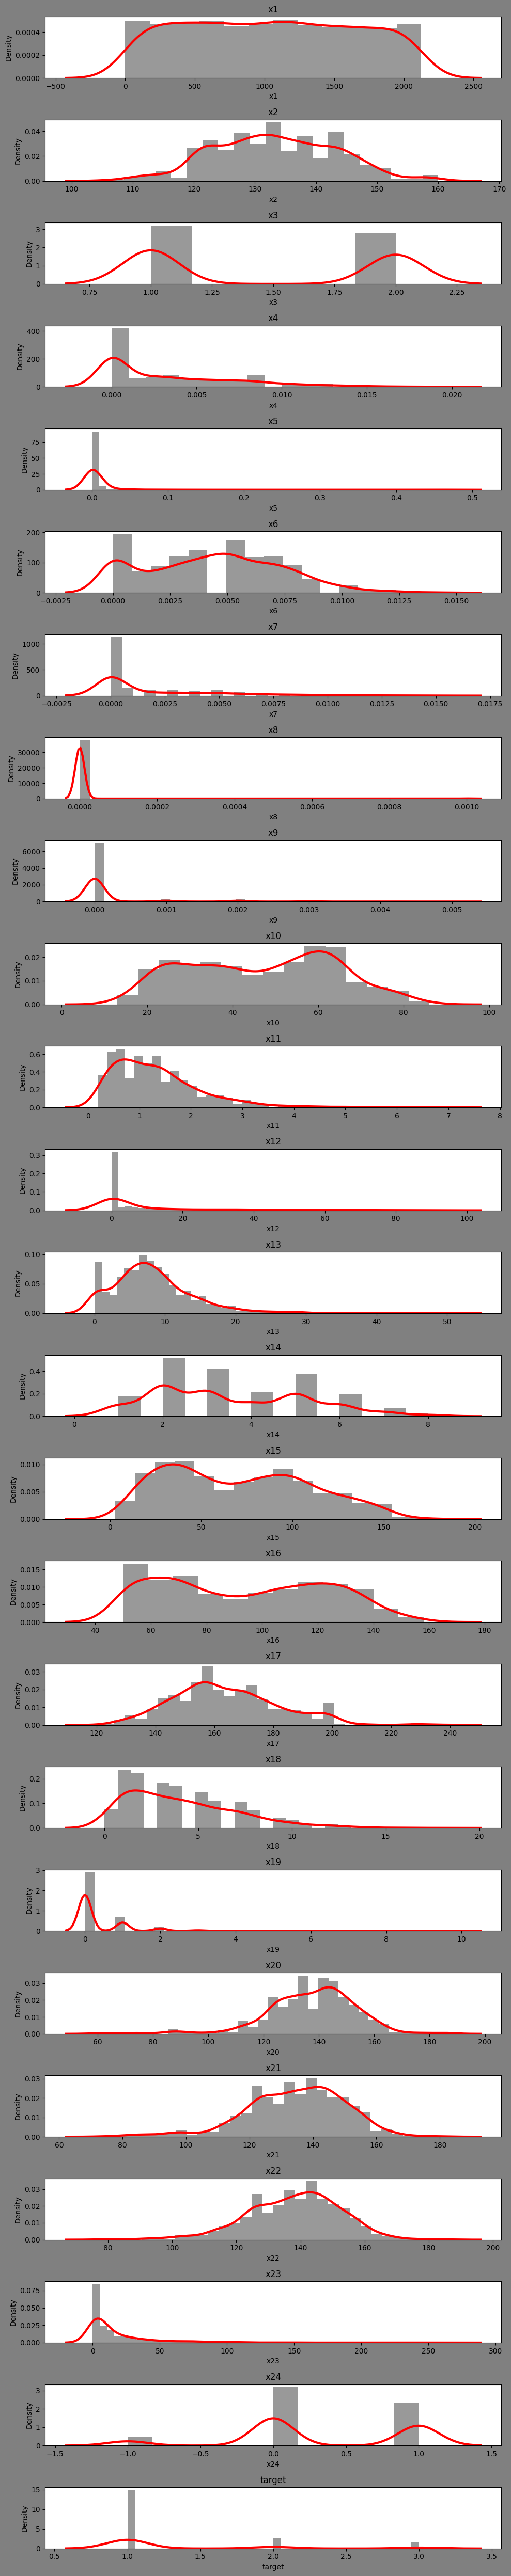

In [26]:
plt.figure(figsize=(10,50),facecolor="grey")
for i in range(len(df_train.columns)):
    plt.subplot(25,1,i+1)
    sns.distplot(df_train[df_train.columns[i]],kde_kws={"color":"r","lw":3,"label":"KDE"},hist_kws={"color":"k"})
    plt.title(df_train.columns[i])
plt.tight_layout()

In [27]:
from scipy import stats
df = df_train
df = df.dropna()
def corr_sig(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

p_values = corr_sig(df)
mask = np.invert(np.tril(p_values<0.05))
# note seaborn will hide correlation were the boolean value is True in the mask

def plot_cor_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, ax=ax,
                mask=mask,
                # cosmetics
                annot=True, vmin=-1, vmax=1, center=0,
                cmap='coolwarm', linewidths=2, linecolor='black', cbar_kws={'orientation': 'horizontal'})
    

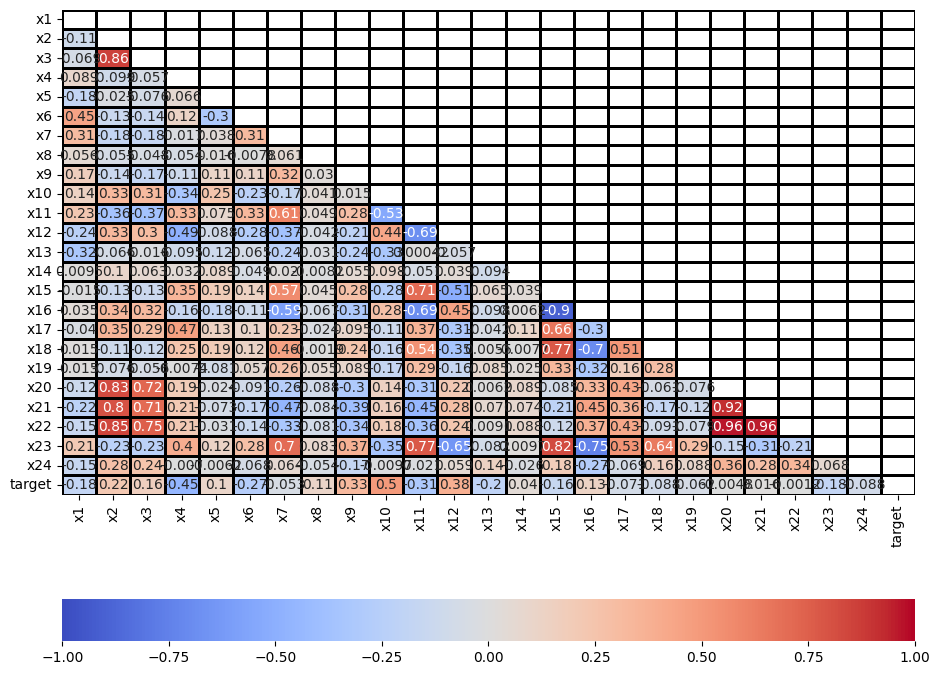

In [28]:
corr = df.corr(method="spearman")
mask = np.triu(corr)
plot_cor_matrix(corr,mask)
plt.show()

In [29]:
print("Spearman P-Value")
from itertools import combinations
import scipy.stats
colnames = list(df_train.columns[:])
comp = list(combinations(colnames,2))
binary_selections = [list(i) for i in set(tuple(i) for i in comp) ]
for j in range(0,len(binary_selections)):
    df_temp = df_train[binary_selections[j]]
    print(df_temp.columns[0]+ "|"+ df_temp.columns[1],"P-value",scipy.stats.spearmanr(df_temp.iloc[:,0], df_temp.iloc[:,1])[1])

Spearman P-Value
x8|x14 P-value 0.7521203347677632
x5|x18 P-value 1.1959844510950597e-13
x9|x19 P-value 0.0006000150936059155
x17|x21 P-value 3.3988784818736156e-46
x11|x20 P-value 1.4061927995053587e-35
x3|x22 P-value 1.2850953204625982e-273
x5|x21 P-value 0.004617443302119185
x2|x16 P-value 7.712897773003668e-42
x3|x8 P-value 0.061807413650366114
x8|x16 P-value 0.009378204994581483
x11|x15 P-value 2.675754933664359e-226
x1|x23 P-value 3.1815009693470473e-16
x2|x3 P-value 0.0
x23|target P-value 9.868887542081308e-13
x2|x13 P-value 0.01071036992098258
x8|x13 P-value 0.23257133367158722
x1|x8 P-value 0.028828325228324476
x15|target P-value 1.5942667764161203e-09
x8|x15 P-value 0.08449616091533625
x3|x10 P-value 1.8722339647271338e-35
x6|x16 P-value 2.0642075131506427e-05
x1|x12 P-value 1.341661984365354e-20
x11|x19 P-value 5.306333498396053e-31
x14|x16 P-value 0.8114770077535172
x12|target P-value 1.4929161432031465e-53
x7|x22 P-value 1.3164742187814397e-40
x6|x13 P-value 0.011526987562

# Let's do the same for the predict data.

In [30]:
df_pred.set_index("id", inplace=True)
df_pred = df_pred.reset_index()
df_test = df_test.reset_index()

merged = pd.merge(df_pred, df_test[['id']], on='id', how='inner')

df_pred = merged.set_index('id')

####here we merged "test" and "pred" over id so that the data is the same

In [31]:
df_test.set_index("id", inplace=True)

# Let's split the train dataset and apply normalization

In [32]:
X = df_train.drop('target',axis=1)
y = df_train['target']

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [34]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
cv  = StratifiedKFold(shuffle=True, random_state=0)

# Let's set up the models one by one and test which parameters we will use for which model.

# LGBM

In [35]:
params = {
    'learning_rate': 0.005,
    "max_depth": 12,
    "num_leaves": 24,  
    "max_bin": 512,
    "num_iterations": 100
}
model = lgb.LGBMClassifier(**params)
model.fit(X_train,y_train,
          eval_set=[(X_test, y_test)],
        early_stopping_rounds=100)

[1]	valid_0's multi_logloss: 0.666844
[2]	valid_0's multi_logloss: 0.660252
[3]	valid_0's multi_logloss: 0.653867
[4]	valid_0's multi_logloss: 0.647665
[5]	valid_0's multi_logloss: 0.641501
[6]	valid_0's multi_logloss: 0.635644
[7]	valid_0's multi_logloss: 0.629825
[8]	valid_0's multi_logloss: 0.624151
[9]	valid_0's multi_logloss: 0.618747
[10]	valid_0's multi_logloss: 0.613404
[11]	valid_0's multi_logloss: 0.608198
[12]	valid_0's multi_logloss: 0.603308
[13]	valid_0's multi_logloss: 0.598374
[14]	valid_0's multi_logloss: 0.593252
[15]	valid_0's multi_logloss: 0.58833
[16]	valid_0's multi_logloss: 0.583426
[17]	valid_0's multi_logloss: 0.578724
[18]	valid_0's multi_logloss: 0.573892
[19]	valid_0's multi_logloss: 0.569167
[20]	valid_0's multi_logloss: 0.564575
[21]	valid_0's multi_logloss: 0.560115
[22]	valid_0's multi_logloss: 0.555672
[23]	valid_0's multi_logloss: 0.551273


C:\Users\ismmk\anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\ismmk\anaconda3\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[24]	valid_0's multi_logloss: 0.54702
[25]	valid_0's multi_logloss: 0.542878
[26]	valid_0's multi_logloss: 0.538829
[27]	valid_0's multi_logloss: 0.534824
[28]	valid_0's multi_logloss: 0.530902
[29]	valid_0's multi_logloss: 0.527112
[30]	valid_0's multi_logloss: 0.523228
[31]	valid_0's multi_logloss: 0.519515
[32]	valid_0's multi_logloss: 0.515849
[33]	valid_0's multi_logloss: 0.5123
[34]	valid_0's multi_logloss: 0.508721
[35]	valid_0's multi_logloss: 0.505219
[36]	valid_0's multi_logloss: 0.501836
[37]	valid_0's multi_logloss: 0.498442
[38]	valid_0's multi_logloss: 0.49511
[39]	valid_0's multi_logloss: 0.491843
[40]	valid_0's multi_logloss: 0.488594
[41]	valid_0's multi_logloss: 0.485412
[42]	valid_0's multi_logloss: 0.48234
[43]	valid_0's multi_logloss: 0.479248
[44]	valid_0's multi_logloss: 0.476223
[45]	valid_0's multi_logloss: 0.473194
[46]	valid_0's multi_logloss: 0.470235
[47]	valid_0's multi_logloss: 0.467375
[48]	valid_0's multi_logloss: 0.464452
[49]	valid_0's multi_logloss: 

LGBMClassifier(learning_rate=0.005, max_bin=512, max_depth=12,
               num_iterations=100, num_leaves=24)

              precision    recall  f1-score   support

         1.0       0.85      1.00      0.92       233
         2.0       0.95      0.47      0.63        45
         3.0       0.75      0.14      0.23        22

    accuracy                           0.85       300
   macro avg       0.85      0.53      0.59       300
weighted avg       0.86      0.85      0.82       300

Accuracy 0.8533333333333334


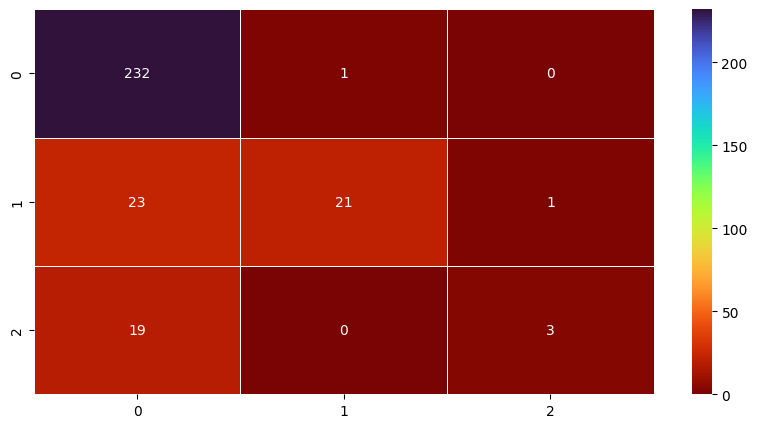

In [36]:
model_pred = model.predict(X_test)
cm = confusion_matrix(y_test, model_pred)
print(classification_report(y_test,model_pred))
print('Accuracy',accuracy_score(y_test, model_pred))
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5,cmap='turbo_r')
plt.show()

# Random Forest

In [37]:
randomForest_model = RandomForestClassifier(random_state=42,class_weight='balanced_subsample')
params = {"n_estimators":[200,300,500,1000],
             "max_features":[3,5,7,9,10],
             "min_samples_split":[2,5,10,20,30]}

randomForest_cv_model = GridSearchCV(randomForest_model,cv=5,param_grid=params,n_jobs=-1).fit(X_train,y_train)
print(randomForest_cv_model.best_params_)

{'max_features': 9, 'min_samples_split': 2, 'n_estimators': 300}


In [38]:
final_randomForest_model = RandomForestClassifier(n_estimators=300,class_weight='balanced_subsample',max_features=9,min_samples_split=2,random_state=42).fit(X_train,y_train)

In [39]:
cross_val_score(final_randomForest_model,X_test,y_test,scoring="accuracy",cv=5)

array([0.91666667, 0.95      , 0.93333333, 0.9       , 0.91666667])

# Decision Tree.

In [40]:
decision_tree_model = DecisionTreeClassifier(random_state=42)
params = {"max_depth":[2,3,5,8,10],"min_samples_split":[2,3,5,10,20,50]}
cv_model = GridSearchCV(decision_tree_model,cv=cv,param_grid=params,n_jobs=-1).fit(X_train,y_train)
print(cv_model.best_params_)

{'max_depth': 5, 'min_samples_split': 5}


In [41]:
final_decisionTree_model = DecisionTreeClassifier(max_depth=5,min_samples_split=5,random_state=42).fit(X_train,y_train)

In [42]:
cross_val_score(final_decisionTree_model,X_test,y_test,scoring="accuracy",cv=5)

array([0.95      , 0.91666667, 0.91666667, 0.85      , 0.88333333])

# GBM

In [43]:
gbm_model = GradientBoostingClassifier(random_state=42)
params = {"learning_rate":[0.1,0.01,0.05],
           "n_estimators":[100,300],
           "max_depth":[2,3]}
gbm_cv_model = GridSearchCV(gbm_model,param_grid=params,cv=cv,n_jobs=-1).fit(X_train,y_train)
print(gbm_cv_model.best_params_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [44]:
final_gbm_model = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42).fit(X_train,y_train)

In [45]:
cross_val_score(final_gbm_model,X_test,y_test,scoring="accuracy",cv=5)

array([0.95      , 0.98333333, 0.95      , 0.95      , 0.95      ])

# Which model scored better?

In [46]:
models=[final_decisionTree_model,
        final_randomForest_model,
        final_gbm_model,
       ]
for model in models:
    predicted=model.predict(X_test)
    score = accuracy_score(y_test,predicted)
    print("Score is: %{:.1f}".format(score*100))

Score is: %93.3
Score is: %94.7
Score is: %95.0


## The best scoring gmb model, let's apply this on the data we're going to test

In [47]:
models=[final_decisionTree_model,
        final_randomForest_model,
        final_gbm_model,
       ]
for model in models:
    predicted = final_gbm_model.predict(df_test)
    df_pred.loc[:,"predicted_target"] = predicted
    print(df_pred["predicted_target"].value_counts())
    
###Applied to test data and exported results to pred file

2.0    476
3.0     19
1.0      3
Name: predicted_target, dtype: int64
2.0    476
3.0     19
1.0      3
Name: predicted_target, dtype: int64
2.0    476
3.0     19
1.0      3
Name: predicted_target, dtype: int64


C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


In [48]:
def encode_proficiency(value):
    if value == 1.0:
        return "Low risk"
    elif value == 2.0:
        return "Moderate risk"
    elif value == 3.0:
        return "High risk"
    else:
        return 0
    
df_pred['predicted_target'] = df_pred['predicted_target'].apply(encode_proficiency)

In [49]:
df_pred

,predicted_target
id,
PA3001,Moderate risk
PA3002,Moderate risk
PA3003,Moderate risk
PA3005,Moderate risk
PA3007,Moderate risk
...,...
PA3523,High risk
PA3524,Moderate risk
PA3525,Moderate risk


# K-MEANS

In [50]:
# Standardize data
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_train) 
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array into a pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(normalized_df) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2)

,P1,P2
0,-0.607526,-0.449634
1,0.700063,-0.496949


C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

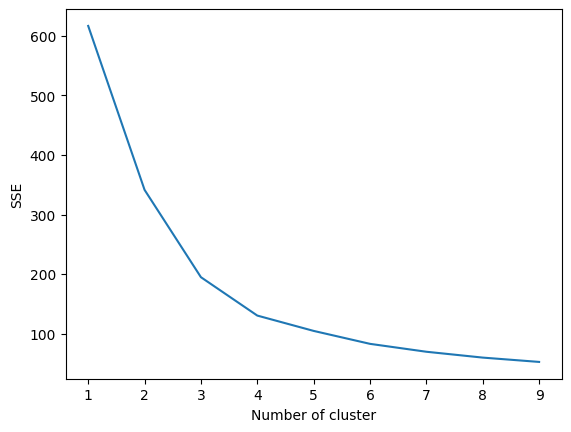

In [51]:
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X_principal)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

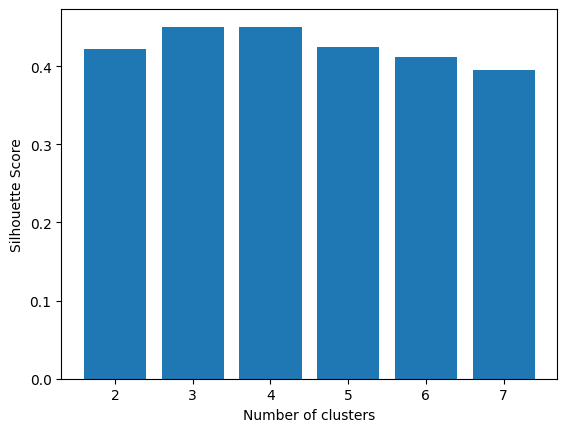

In [52]:
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(X_principal, KMeans(n_clusters = n_cluster).fit_predict(X_principal))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

In [53]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_principal)

C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


KMeans(n_clusters=4)

C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


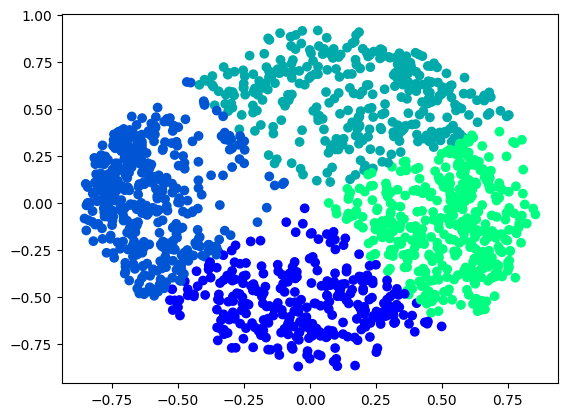

In [54]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = KMeans(n_clusters = 4).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

C:\Users\ismmk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


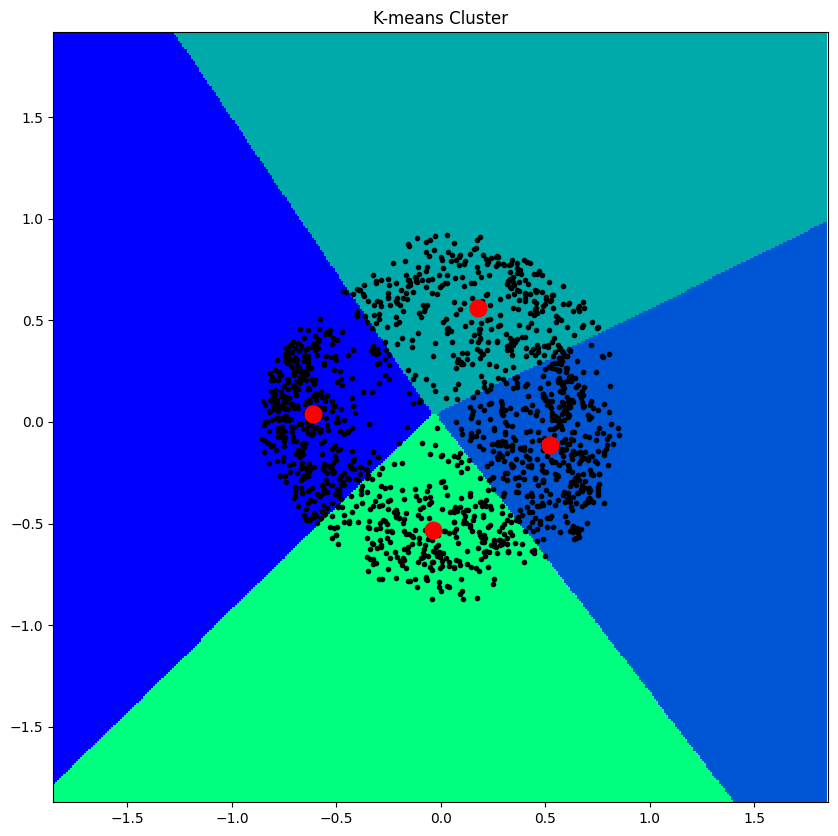

In [55]:
fig = plt.figure(figsize=(10,10))

h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = X_principal['P1'].min() - 1, X_principal['P1'].max() + 1
y_min, y_max = X_principal['P2'].min() - 1, X_principal['P2'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.

# https://www.quora.com/Can-anybody-elaborate-the-use-of-c_-in-numpy
# https://www.geeksforgeeks.org/differences-flatten-ravel-numpy/
# Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = kmeans.predict(np.array(list(zip(xx.ravel(), yy.ravel()))))
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
# https://stackoverflow.com/questions/16661790/difference-between-plt-close-and-plt-clf
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.winter,
           aspect='auto', origin='lower')

plt.plot(X_principal['P1'], X_principal['P2'], 'k.', markersize=6)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=100, linewidths=3,
            color='r', zorder=10)
plt.title('K-means Cluster')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()
